In [38]:
# Read files
import numpy as np
import pandas as pd

data2020 = pd.read_excel(
    "2021資料(1).xlsx",
    sheet_name="2020"
)
q12021 = pd.read_excel(
    "2021資料(1).xlsx",
    sheet_name="Q1不動產"
)
q22021 = pd.read_excel(
    "2021資料(1).xlsx",
    sheet_name="Q2不動產"
)
q32021 = pd.read_excel(
    "2021資料(1).xlsx",
    sheet_name="Q3不動產"
)

print("data2020 shape:", data2020.shape)
print("q12021 shape:", q12021.shape)
print("q22021 shape:", q22021.shape)
print("q32021 shape:", q32021.shape)

data2020 shape: (9061, 27)
q12021 shape: (3405, 24)
q22021 shape: (3414, 24)
q32021 shape: (348, 24)


In [39]:
# Correct「交易年月日」 format in q1~q3
q12021['year'] = q12021['交易年月日'].dt.strftime("%Y").astype(int)
q12021['month'] = q12021['交易年月日'].dt.strftime("%m").astype(int)
q12021['date'] = q12021['交易年月日'].dt.strftime("%d").astype(int)

# q22021['year'] = q22021['交易年月日'].dt.strftime("%Y").astype(int)
# q22021['month'] = q22021['交易年月日'].dt.strftime("%m").astype(int)
# q22021['date'] = q22021['交易年月日'].dt.strftime("%d").astype(int)

# q32021['year'] = q32021['交易年月日'].dt.strftime("%Y").astype(int)
# q32021['month'] = q32021['交易年月日'].dt.strftime("%m").astype(int)
# q32021['date'] = q32021['交易年月日'].dt.strftime("%d").astype(int)

# data2020['year'] = data2020['交易年月日'].dt.strftime("%Y").astype(int)
# data2020['month'] = data2020['交易年月日'].dt.strftime("%m").astype(int)
# data2020['date'] = data2020['交易年月日'].dt.strftime("%d").astype(int)

q22021['year'] = ((q22021['交易年月日'] / 10000).astype(int)) + 1911
q22021['date'] = (q22021['交易年月日'] % 100)
q22021['month'] = (((q22021['交易年月日'] % 10000) - q22021['date']) / 100 ).astype(int)

q32021['year'] = ((q32021['交易年月日'] / 10000).astype(int)) + 1911
q32021['date'] = (q32021['交易年月日'] % 100)
q32021['month'] = (((q32021['交易年月日'] % 10000) - q32021['date']) / 100 ).astype(int)

data2020['year'] = ((data2020['交易年月日'] / 10000).astype(int)) + 1911
data2020['date'] = (data2020['交易年月日'] % 100)
data2020['month'] = (((data2020['交易年月日'] % 10000) - data2020['date']) / 100 ).astype(int)

In [40]:
data2020['date']

0       10
1       10
2       12
3       28
4        2
        ..
9056    10
9057     6
9058    12
9059    28
9060    18
Name: date, Length: 9061, dtype: int64

In [41]:
# Inspect their columns
# Find columns in 2020 data not in 2021 data
spare = []
print("Columns in 2020 not in 2021:")
for c in data2020.columns:
    if c not in q12021.columns:
        spare.append(c)
        print(c)

# Remove these columns
for c in spare:
    data2020 = data2020.drop(c, axis=1)

# Now the columns in two data are the same

Columns in 2020 not in 2021:
車位類別
車位移轉總面積(平方公尺)
車位總價元


In [42]:
# Concatenate altogether
df = pd.concat([data2020, q12021, q22021, q32021])
print("df shape:", df.shape)

df shape: (16228, 27)


In [43]:
# Fill null value in '移轉層次項目'
df['移轉層次項目'] = df['移轉層次項目'].fillna('無')

# Abandon other data with null values
df = df.dropna(axis=0, how = 'any')
print("df shape:", df.shape)

df shape: (14736, 27)


In [44]:
# Construct Housing Age
df['建築完成年月'] = df['建築完成年月'].dt.strftime("%Y").astype(str).str[:4].astype(int)
df['屋齡'] = df['year'] - df['建築完成年月']
print("df shape:", df.shape)

df shape: (14736, 28)


In [45]:
# Other variables preprocessing 
df['有無管理組織'] = df['有無管理組織'].str.contains('有').astype(int)
df['建物現況格局-隔間'] = df['建物現況格局-隔間'].str.contains('有').astype(int)
df = df.drop(df[df['車位數'] == '位'].index)
df['車位數'] = df['車位數'].astype(int)

print("df shape:", df.shape)

df shape: (14729, 28)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [46]:
# 不轉換
# Dummy Variables
# dummy_1 = pd.get_dummies(df['建物型態'], prefix='建物型態')
# df = pd.concat([dummy_1,df],axis=1)
# dummy_2 = pd.get_dummies(df['主要用途'], prefix='主要用途')
# df = pd.concat([df,dummy_2],axis=1)
# dummy_3 = pd.get_dummies(df['鄉鎮市區'], prefix='鄉鎮市區')
# df = pd.concat([df,dummy_3],axis=1)
# dummy_4 = pd.get_dummies(df['移轉層次項目'], prefix='移轉層次項目')
# df = pd.concat([df,dummy_4],axis=1)
# dummy_5 = pd.get_dummies(df["主要建材"], prefix="建材")
# df = pd.concat([df,dummy_5],axis=1)
# dummy_6 = pd.get_dummies(df["都市土地使用分區"], prefix="使用分區")
# df = pd.concat([df,dummy_6],axis=1)

df = df.reset_index()
print("df shape:", df.shape)

df shape: (14729, 29)


In [95]:
# 先留著outliers
# Delete Outliers
# totalPrice = df["單價元平方公尺"]
# Q1 = np.quantile(totalPrice, 1/4)
# Q3 = np.quantile(totalPrice, 3/4)
# IQR = Q3 - Q1

# # Outliers defined as not in the interval (Q1 - 1.5*IQR, Q3 + 1.5*IQR)
# outliers_idx = []
# for i in range(totalPrice.shape[0]):
#     if (totalPrice.iloc[i] > (Q3 + 1.5*IQR)) or (totalPrice.iloc[i] < (Q1 - 1.5*IQR)):
#         outliers_idx.append(i)

# for i in outliers_idx:
#      df = df.drop(i, axis=0)

# print("df shape:", df.shape)
# print(df.columns)

df shape: (14308, 140)
Index(['index', '建物型態_住宅大樓(11層含以上有電梯)', '建物型態_公寓(5樓含以下無電梯)', '建物型態_其他',
       '建物型態_套房(1房1廳1衛)', '建物型態_店面(店鋪)', '建物型態_華廈(10層含以下有電梯)', '建物型態_辦公商業大樓',
       '鄉鎮市區', '交易標的',
       ...
       '使用分區_第二種商業區及第三種住宅區', '使用分區_第二類住宅用地', '使用分區_第四之一種住宅區',
       '使用分區_第四之一種住宅區及第四之一種住宅區', '使用分區_第四之一種住宅區及第四種住宅區', '使用分區_第四種住宅區',
       '使用分區_第四種住宅區及第三種住宅區', '使用分區_第四種住宅區及第參種商業區', '使用分區_第四種住宅區及第四之一種住宅區',
       '使用分區_第四種住宅區及道路用地'],
      dtype='object', length=140)


In [47]:
# Drop meaningless column
toDrop = ["index", "交易標的", "建築完成年月", "year", "month", "date", "總價元", '交易年月日']
# len(toDrop) = 13

for acol in toDrop:
    df = df.drop(acol, axis=1)

# Drop strange data: idx7963
df = df.drop(7963, axis=0)

# 下面不執行
# address = df["土地位置建物門牌"]
# df = df.drop("土地位置建物門牌", axis=1)
# df = df.apply(pd.to_numeric)  # turn into numerical value
# df = pd.concat([df, address], axis=1).reset_index().drop('index', axis=1)

print("df shape:", df.shape)

df shape: (14728, 21)


In [ ]:
# 先不執行
# Standardization
# from sklearn.preprocessing import StandardScaler

# num_columns = ['土地移轉總面積平方公尺','土地數','建物數','車位數','移轉層次','總樓層數',
#                '建物移轉總面積平方公尺','建物現況格局-房','建物現況格局-廳','建物現況格局-衛',
#                '建物現況格局-隔間','屋齡']

# scaler = StandardScaler()
# numerical_df = scaler.fit_transform(df[num_columns])
# numerical_df = pd.DataFrame(numerical_df, columns=num_columns)

# # merge into df
# df = df.drop(num_columns, axis=1)
# df = pd.concat([numerical_df, df], axis=1)
# print("df shape:", df.shape)

df shape: (14307, 126)


In [ ]:
# 不用
# Remove feature appears less than 10 times
# minN = 10
# for col in df.columns[12:-1]:  # dummy variables start at idx.12
# #     print("col =", col)
# #     print(df_dropped[col].sum())
# #     print("-"*80)
#     if df[col].sum() < minN:
#         df = df.drop(col, axis=1)
# print("df shape:", df.shape)

df shape: (14307, 83)


In [48]:
# Inspect all columns
for i in df.columns:
    print(i)

鄉鎮市區
土地位置建物門牌
土地移轉總面積平方公尺
都市土地使用分區
土地數
建物數
車位數
移轉層次
移轉層次項目
總樓層數
建物型態
主要用途
主要建材
建物移轉總面積平方公尺
建物現況格局-房
建物現況格局-廳
建物現況格局-衛
建物現況格局-隔間
有無管理組織
單價元平方公尺
屋齡


In [51]:
pip install seaborn

In [63]:
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei UI'] 
plt.rcParams['axes.unicode_minus'] = False

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 21934 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20729 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20803 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 24179 missing from current font.
  font.set_text(s, 0.0, flags=flags

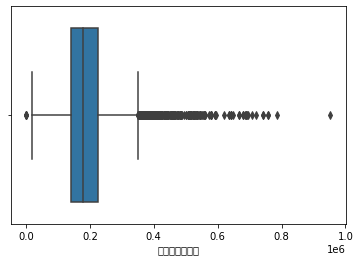

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(df["單價元平方公尺"])
plt.show()

# 下面屬於 x y train test split

In [ ]:
# Set labels
y = df["單價元平方公尺"]
x = df.drop(["單價元平方公尺"], axis=1)

In [ ]:
# Split training and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Validation data
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1)
print("X_train:", X_train.shape)
print("X_valid:", X_valid.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)
print("y_valid:", y_valid.shape)

# X_train.to_csv("C:/Users/andyi/OneDrive/桌面/統計學習與深度學習/Final Project/data/DATASET/X_train.csv")
# X_valid.to_csv("C:/Users/andyi/OneDrive/桌面/統計學習與深度學習/Final Project/data/DATASET/X_valid.csv")
# X_test.to_csv("C:/Users/andyi/OneDrive/桌面/統計學習與深度學習/Final Project/data/DATASET/X_test.csv")
# y_train.to_csv("C:/Users/andyi/OneDrive/桌面/統計學習與深度學習/Final Project/data/DATASET/y_train.csv")
# y_test.to_csv("C:/Users/andyi/OneDrive/桌面/統計學習與深度學習/Final Project/data/DATASET/y_test.csv")
# y_valid.to_csv("C:/Users/andyi/OneDrive/桌面/統計學習與深度學習/Final Project/data/DATASET/y_valid.csv")

X_train: (10300, 82)
X_valid: (1145, 82)
X_test: (2862, 82)
y_train: (10300,)
y_test: (2862,)
y_valid: (1145,)
